In [88]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [89]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

### Image Similarity

In [90]:
imageA=cv2.imread(files[6],0)
imageA=cv2.resize(imageA,(100,100))
imageB=cv2.imread(files[7],0)
imageB=cv2.resize(imageB,(100,100))
print(mse(imageA,imageB))
print(ssim(imageA,imageB))

8284.8763
0.08580072115075538


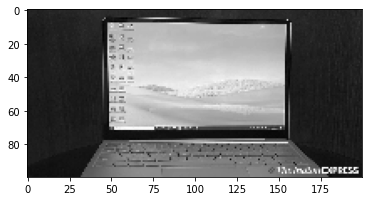

In [104]:
imageA=cv2.imread('Front_View_2.jpg',0)
imageA=cv2.resize(imageA,(200,100))
plt.imshow(imageA,cmap='gray');

In [105]:
def compare_img(i):
    imageB=cv2.imread(i,0)
    imageB=cv2.resize(imageB,(200,100))
    return i.split("\\")[1],mse(imageA,imageB),ssim(imageA,imageB)

In [107]:
import pandas as pd
pd.DataFrame(map(compare_img,files),columns=['images','mse','ssim']).sort_values(by=['ssim'],ascending=False)

,images,mse,ssim
13,OIP (16).jpg,12088.11845,0.228770
21,OIP.jpg,12046.11450,0.228744
8,OIP (10).jpg,7013.69615,0.168651
9,OIP (12).jpg,5894.75675,0.161806
15,OIP (19).jpg,11693.16220,0.155851
6,images (2).jpg,10174.20140,0.145031
16,OIP (20).jpg,9800.10225,0.136561
14,OIP (17).jpg,17732.60220,0.127094
5,images (1).jpg,23224.74685,0.118989
18,OIP (26).jpg,11014.24500,0.107243


In [40]:
file=files[3]

In [41]:
img_gray=cv2.imread(file,0)

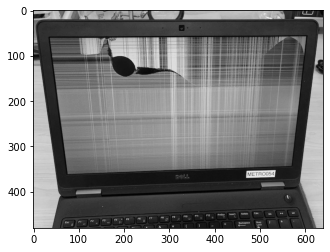

In [42]:
plt.imshow(img_gray,cmap='gray');

In [43]:
img_resized=cv2.resize(img_gray,(100,100))
img_resized.shape

(100, 100)

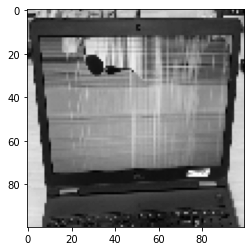

In [44]:
plt.imshow(img_resized,cmap='gray');

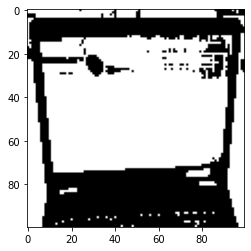

In [45]:
ret,th1 = cv2.threshold(img_resized,75,255,cv2.THRESH_BINARY)
plt.imshow(th1,cmap='gray');

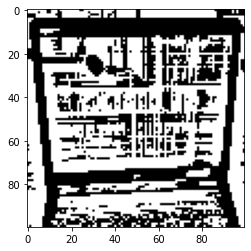

In [46]:
th2 = cv2.adaptiveThreshold(img_resized,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

plt.imshow(th2,cmap='gray');

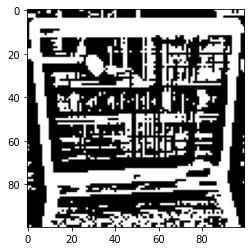

In [47]:
th3 = cv2.adaptiveThreshold(img_resized,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)

plt.imshow(th3,cmap='gray');

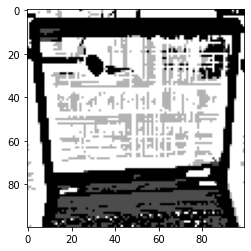

In [48]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
plt.imshow(blended,cmap='gray');